#**Exploratory Data Analysis -Real Estate Industry in Bangladesh**

EDA summary (Group 3)
In this EDA we tried to answer the following questions:

Question 4

a) How do property prices fluctuate for same location?

b) How do property prices fluctuate for same property size?

c) How do property prices fluctuate for same / similar amenities?

Answer Summary :
- 4.a) Average price for different cities observed very much fluctuating there is no pattern observed . Mean value followed range 0.2 to 0.5*10^7 

- 4.b) Relation between price Vs Property size observed Linear for 80% data,   after removing missing values ,
   - Missing values area Price-3%, area-6.37%   
- 4.C) Answer in  7c & d

Question 7

a) Which amenities are the more frequent in Residential properties ?
- the percentage contribution of each amenity in Residential properties. The top Three amenities were "expendable_amenity_count" (26.9%),"maintenance_or_cleaning_amenity_count" (17.8%), "security_amenity_count" (17.6%), Unclassified amenities 41.45%t

b) Which amenities are the more frequent in Commercial properties ?
- the percentage contribution of each amenity in Commercialproperties. The top Three amenities were "expendable_amenity_count" (25.9%),"maintenance_or_cleaning_amenity_count" (17.6%), "security_amenity_count"(11.2%), Unclassified amenities 41.7%

c) & d)  Which amenities have the more impact on price?
- security_amenity_count,maintenance_or_cleaning_amenity_count    
  expendable_amenity_count OBSERVED Moderately positively co-related (0.35) with price and others amenities has no Relation with price

# Importing Required Libararies 

In [ ]:
pip install fancyimpute

In [ ]:
# Importing required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
from sklearn.impute import KNNImputer
import missingno as msno
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from fancyimpute import KNN

# **Basic Exploration of Real Estate Industry in Bangladesh**

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/merged_datasets.csv")
df.head(10)

<ipython-input-39-01b66f3149a6>:1: DtypeWarning:

Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.



,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,property_url,...,id,garage,year_built,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count
0,1185.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,6100000.0,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,This flat consists of facilities you can think...,https://www.bproperty.com/en/property/details-...,...,bproperty-0,0.0,NaN,0,1,2,0,2,0,3
1,2464.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,4.0,3.0,28900000.0,A Vibrant 2464 Sq Ft Residential Flat For Sale...,Ready to move in somewhere with everything nea...,https://www.bproperty.com/en/property/details-...,...,bproperty-1,0.0,NaN,0,2,0,0,3,0,4
2,1140.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,7500000.0,1140 Sq Ft Nicely Planned Apartment Is Availab...,A spacious 1140 Square Feet apartment in Mirp...,https://www.bproperty.com/en/property/details-...,...,bproperty-2,0.0,NaN,0,2,2,0,2,0,4
3,1920.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,20000000.0,A Modern Well-planned Apartment Of 1920 Sq Ft ...,Looking for the perfect home that offers a lux...,https://www.bproperty.com/en/property/details-...,...,bproperty-3,0.0,NaN,0,1,2,0,3,0,3
4,1445.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,10800000.0,"1445 Sq Ft Ready Flat For Sale In Banasree, Wi...",Choosing a new home can be an overwhelming exp...,https://www.bproperty.com/en/property/details-...,...,bproperty-4,0.0,NaN,0,0,2,0,1,0,4
5,925.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,2.0,5000000.0,Deal With This 925 Sq Ft Ready Flat For Sale I...,Choosing a new home can be an overwhelming exp...,https://www.bproperty.com/en/property/details-...,...,bproperty-5,0.0,NaN,0,1,2,0,2,0,3
6,2468.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,36500000.0,Tastefully Designed This 2468 Sq Ft Flat Is No...,Looking for an apartment on a budget? Then thi...,https://www.bproperty.com/en/property/details-...,...,bproperty-6,0.0,NaN,0,2,2,0,4,0,4
7,1475.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,10500000.0,"At Uttara, A 1475 Sq Ft Well Fitted Residentia...","End the disparity of wanting a suitable home, ...",https://www.bproperty.com/en/property/details-...,...,bproperty-7,0.0,NaN,0,2,3,0,3,0,4
8,1066.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/13...,2.0,3.0,8000000.0,Attention! A 1066 Sq. Ft Flat Is Up For Sale A...,So you are looking for a cozy abode? We will h...,https://www.bproperty.com/en/property/details-...,...,bproperty-8,0.0,NaN,0,1,2,1,4,0,4
9,950.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,2.0,2.0,5000000.0,Here Is A Cozy And Nice Flat Of 950 Sq Ft Wait...,Introducing a stunning residential apartment l...,https://www.bproperty.com/en/property/details-...,...,bproperty-9,0.0,NaN,0,1,2,0,5,0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35646 entries, 0 to 35645
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33374 non-null  float64
 1   building_type                          35465 non-null  object 
 2   building_nature                        35646 non-null  object 
 3   image_url                              17312 non-null  object 
 4   num_bath_rooms                         35646 non-null  float64
 5   num_bed_rooms                          35646 non-null  float64
 6   price                                  34578 non-null  float64
 7   property_description                   18259 non-null  object 
 8   property_overview                      17553 non-null  object 
 9   property_url                           35621 non-null  object 
 10  purpose                                35632 non-null  object 
 11  ci

#Exploring features 

# Numerical Features 
1. Area
2. num_bath_rooms          
4. num_bed_rooms             
5. price                  
6. garage                          
7. year_built                             
8. relaxation_amenity_count               
9. security_amenity_count                 
10. maintenance_or_cleaning_amenity_count  
11. social_amenity_count                   
12. Expendable_amenity_count 
13. Service_staff_amenity_count  
14. Unclassify_amenity_count 

In [ ]:
Numerical_features = ['Area','num_bath_rooms','num_bed_rooms','pricegarage','year_built','relaxation_amenity_count','security_amenity_count','maintenance_or_cleaning_amenity_count','social_amenity_count','Expendable_amenity_count',
'Service_staff_amenity_count','Unclassify_amenity_count']


# Categorical Features 
1. building_type
2. building_nature
3. image_url
4. property_description
5. property_overview
6. property_url
7. purpose
8. city  
9. locality                
10. address     
11. id

In [ ]:
Categorical_Features=['building_type','building_nature','image_url','property_description','property_overview','property_url','purpose','city','locality','address','id']


In [ ]:
df.describe(include='all')

,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,property_url,...,id,garage,year_built,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count
count,33374.000000,35465,35646,17312,35646.000000,35646.000000,3.457800e+04,18259,17553,35621,...,35646,35646.000000,256.000000,35646.000000,35646.000000,35646.000000,35646.000000,35646.000000,35646.000000,35646.000000
unique,NaN,21,2,17312,NaN,NaN,NaN,17969,10082,35621,...,35646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,NaN,NaN,NaN,Two Room Furnished Serviced Apartment RENT in ...,A happy future in your dream home is in your h...,https://www.bproperty.com/en/property/details-...,...,bproperty-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,26291,28892,1,NaN,NaN,NaN,14,496,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1993.159806,NaN,NaN,NaN,1.624474,2.224317,1.046375e+09,NaN,NaN,NaN,...,NaN,0.005891,2019.796875,0.013550,0.501852,0.743702,0.077540,1.133479,0.026567,1.727992
std,4622.888250,NaN,NaN,NaN,1.649708,1.867082,1.301329e+11,NaN,NaN,NaN,...,NaN,0.081500,4.186551,0.186398,0.774929,0.997127,0.394366,1.531004,0.263230,2.178734
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,...,NaN,0.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1050.000000,NaN,NaN,NaN,0.000000,1.000000,2.500000e+04,NaN,NaN,NaN,...,NaN,0.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1400.000000,NaN,NaN,NaN,2.000000,3.000000,1.750000e+05,NaN,NaN,NaN,...,NaN,0.000000,2022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2130.000000,NaN,NaN,NaN,3.000000,3.000000,6.200000e+06,NaN,NaN,NaN,...,NaN,0.000000,2022.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000,3.000000


In [ ]:
df.head()

,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,property_url,...,id,garage,year_built,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count
0,1185.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,6100000.0,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,This flat consists of facilities you can think...,https://www.bproperty.com/en/property/details-...,...,bproperty-0,0.0,NaN,0,1,2,0,2,0,3
1,2464.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,4.0,3.0,28900000.0,A Vibrant 2464 Sq Ft Residential Flat For Sale...,Ready to move in somewhere with everything nea...,https://www.bproperty.com/en/property/details-...,...,bproperty-1,0.0,NaN,0,2,0,0,3,0,4
2,1140.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,7500000.0,1140 Sq Ft Nicely Planned Apartment Is Availab...,A spacious 1140 Square Feet apartment in Mirp...,https://www.bproperty.com/en/property/details-...,...,bproperty-2,0.0,NaN,0,2,2,0,2,0,4
3,1920.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,20000000.0,A Modern Well-planned Apartment Of 1920 Sq Ft ...,Looking for the perfect home that offers a lux...,https://www.bproperty.com/en/property/details-...,...,bproperty-3,0.0,NaN,0,1,2,0,3,0,3
4,1445.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,10800000.0,"1445 Sq Ft Ready Flat For Sale In Banasree, Wi...",Choosing a new home can be an overwhelming exp...,https://www.bproperty.com/en/property/details-...,...,bproperty-4,0.0,NaN,0,0,2,0,1,0,4


In [ ]:
df.tail()

,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,property_url,...,id,garage,year_built,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count
35641,1650.0,NaN,Residential,NaN,4.0,3.0,17000000.0,Are you searching for a beautiful home to buy ...,NaN,https://btibrokeragebd.com/property/1650-sft-a...,...,btibrokeragebd-176,0.0,NaN,0,3,0,0,0,0,0
35642,1240.0,NaN,Residential,NaN,2.0,2.0,13000000.0,Are you searching for a beautiful home to buy ...,NaN,https://btibrokeragebd.com/property/1240-sft-a...,...,btibrokeragebd-177,0.0,NaN,0,3,0,0,0,0,0
35643,1250.0,NaN,Residential,NaN,2.0,3.0,9500000.0,Are you searching for a beautiful home to buy ...,NaN,https://btibrokeragebd.com/property/1250sft-ap...,...,btibrokeragebd-178,0.0,NaN,0,4,0,0,0,0,0
35644,1464.0,NaN,Residential,NaN,3.0,3.0,22000000.0,Are you searching for a beautiful home to buy ...,NaN,https://btibrokeragebd.com/property/1464-sft-a...,...,btibrokeragebd-179,0.0,NaN,0,4,0,0,0,0,0
35645,1420.0,NaN,Residential,NaN,3.0,3.0,11500000.0,Are you searching for a beautiful home to buy ...,NaN,https://btibrokeragebd.com/property/1420-sft-a...,...,btibrokeragebd-180,0.0,NaN,0,2,0,0,0,0,0


In [ ]:
df.shape # We Have 24 attributes and 35646 Records

(35646, 24)

# Dealing With Missing Values

In [ ]:
df.isnull().sum() # Gives Count of Missing values in perticular column

area                                      2272
building_type                              181
building_nature                              0
image_url                                18334
num_bath_rooms                               0
num_bed_rooms                                0
price                                     1068
property_description                     17387
property_overview                        18093
property_url                                25
purpose                                     14
city                                       536
locality                                   600
address                                   5139
id                                           0
garage                                       0
year_built                               35390
relaxation_amenity_count                     0
security_amenity_count                       0
maintenance_or_cleaning_amenity_count        0
social_amenity_count                         0
expendable_am

<Axes: >

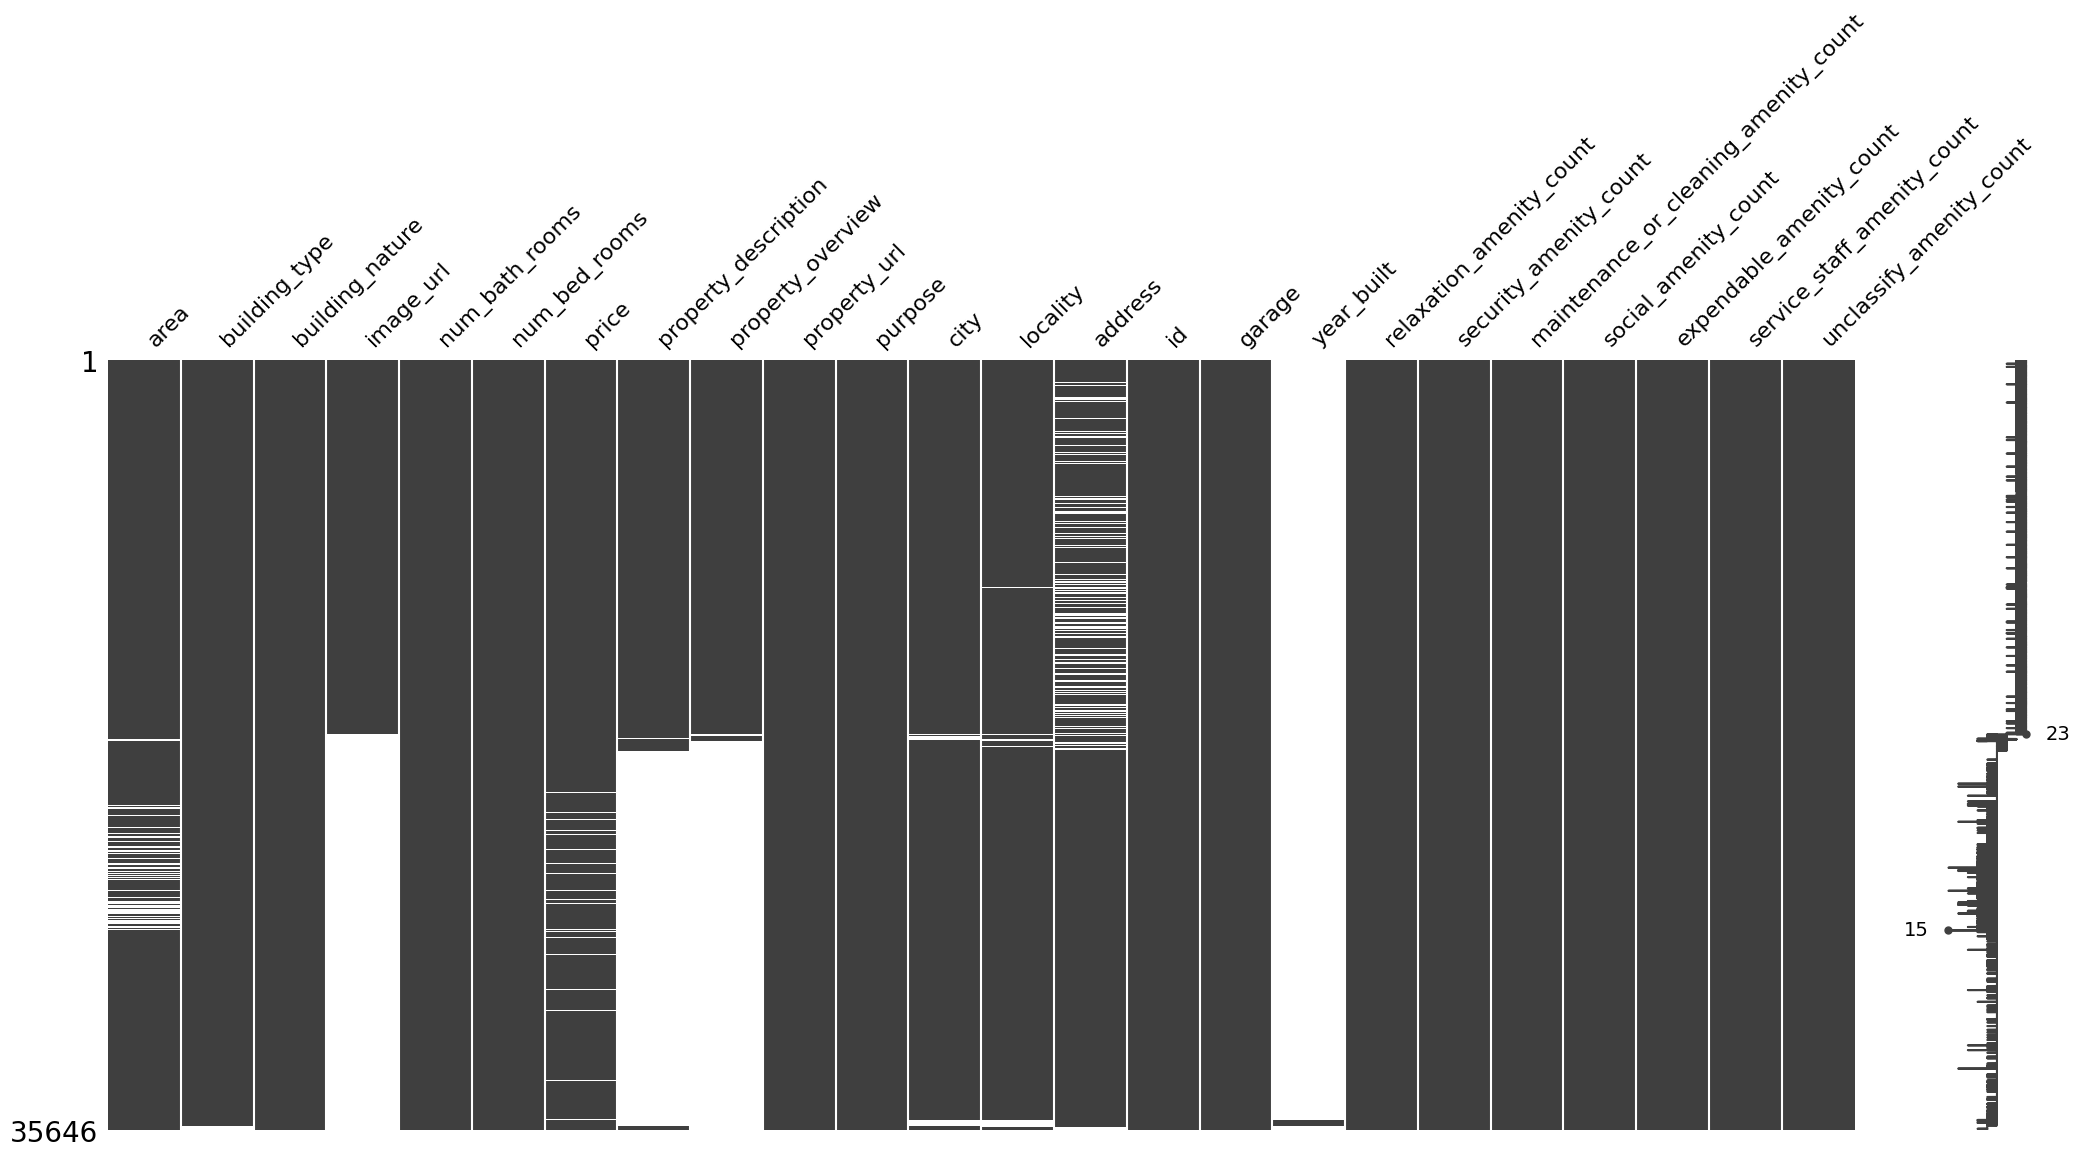

In [ ]:
msno.matrix(df) # visualization of missing values

In [ ]:
(df.isna().mean() * 100).round(2)

area                                      6.37
building_type                             0.51
building_nature                           0.00
image_url                                51.43
num_bath_rooms                            0.00
num_bed_rooms                             0.00
price                                     3.00
property_description                     48.78
property_overview                        50.76
property_url                              0.07
purpose                                   0.04
city                                      1.50
locality                                  1.68
address                                  14.42
id                                        0.00
garage                                    0.00
year_built                               99.28
relaxation_amenity_count                  0.00
security_amenity_count                    0.00
maintenance_or_cleaning_amenity_count     0.00
social_amenity_count                      0.00
expendable_am

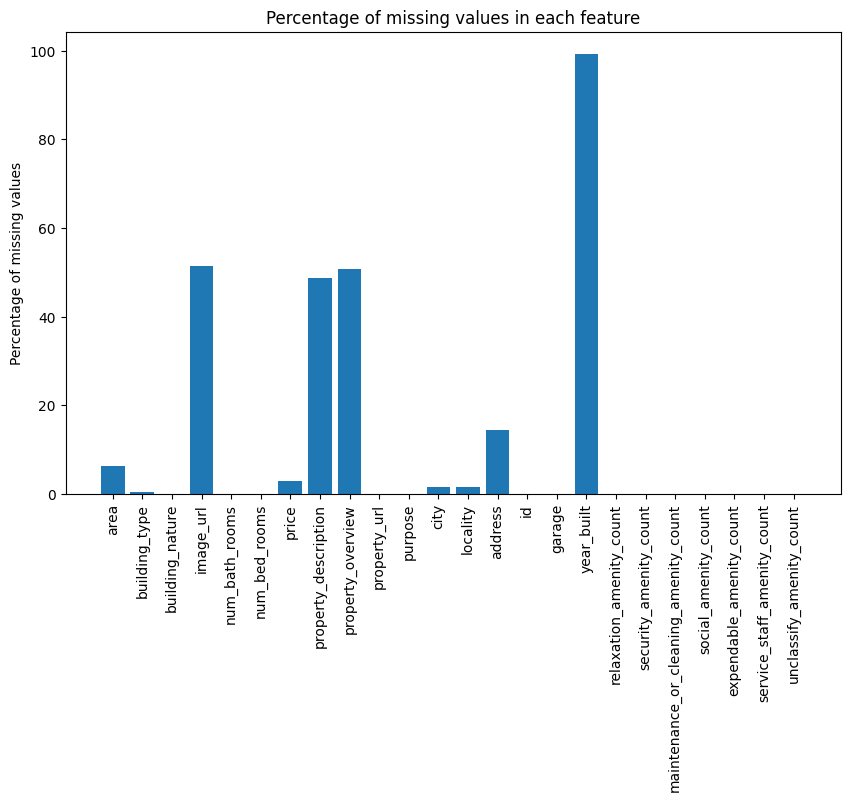

In [ ]:
missing_percentages = (df.isna().mean() * 100).round(2)
plt.figure(figsize=(10,6))
plt.bar(missing_percentages.index, missing_percentages.values)
plt.xticks(rotation=90)
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values in each feature')
plt.show()

In [ ]:
threshold = len(df) * 0.9 # set the threshold to 60% non-missing values
df.dropna(thresh=threshold, axis=1, inplace=True)

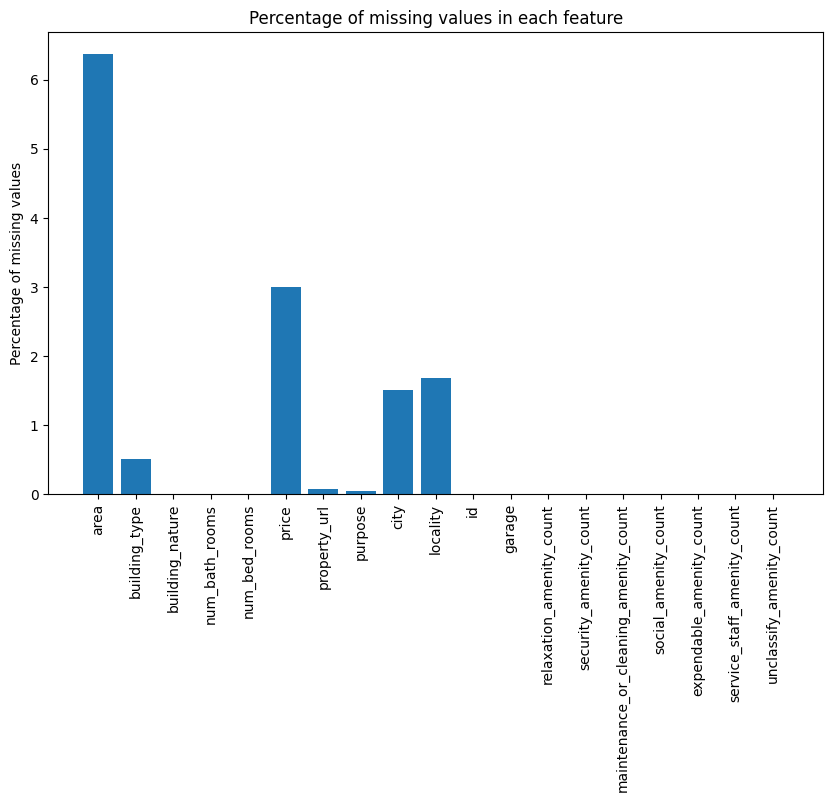

In [ ]:
missing_percentages = (df.isna().mean() * 100).round(2)
plt.figure(figsize=(10,6))
plt.bar(missing_percentages.index, missing_percentages.values)
plt.xticks(rotation=90)
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values in each feature')
plt.show()

In [ ]:
from fancyimpute import IterativeImputer
# Area & Price fill with missing N-Computing technique 
df1=df.loc[:,["price","area"]]
df3 = df1.copy(deep=True)
MICE_imputer = IterativeImputer()
df3.iloc[:, :] = MICE_imputer.fit_transform(df3)
df['price']=df3['price']
df['area']=df3['area']


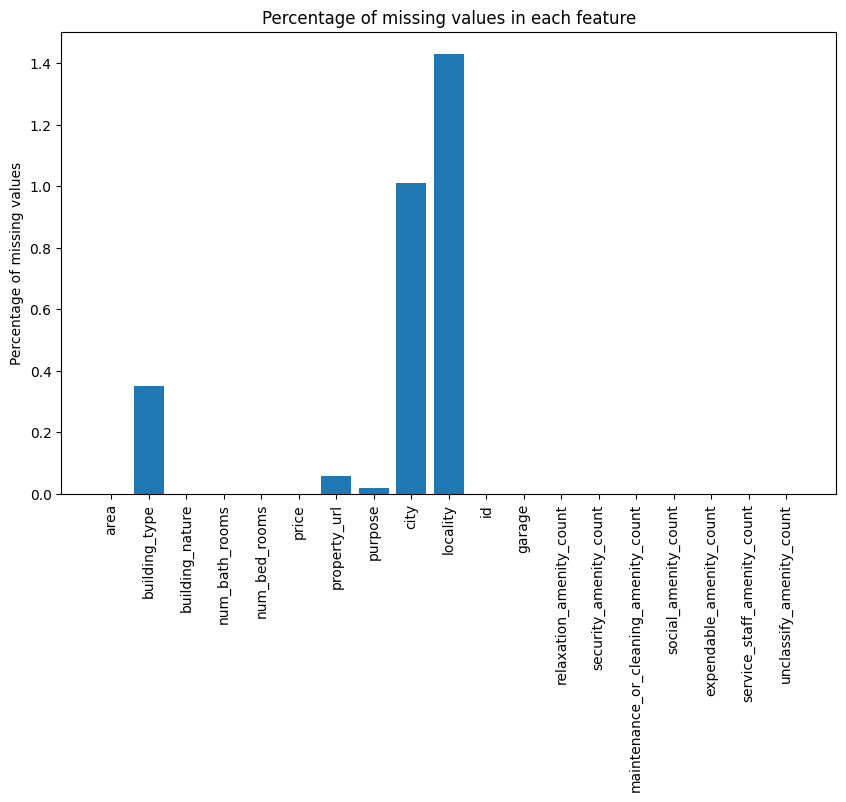

In [ ]:
missing_percentages = (df.isna().mean() * 100).round(2)
plt.figure(figsize=(10,6))
plt.bar(missing_percentages.index, missing_percentages.values)
plt.xticks(rotation=90)
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values in each feature')
plt.show()

In [ ]:
(df.isna().mean() * 100).round(2)

area                                     0.00
building_type                            0.51
building_nature                          0.00
num_bath_rooms                           0.00
num_bed_rooms                            0.00
price                                    0.00
property_url                             0.07
purpose                                  0.04
city                                     1.50
locality                                 1.68
id                                       0.00
garage                                   0.00
relaxation_amenity_count                 0.00
security_amenity_count                   0.00
maintenance_or_cleaning_amenity_count    0.00
social_amenity_count                     0.00
expendable_amenity_count                 0.00
service_staff_amenity_count              0.00
unclassify_amenity_count                 0.00
dtype: float64

In [ ]:
df.isnull().sum()

area                                       0
building_type                            181
building_nature                            0
num_bath_rooms                             0
num_bed_rooms                              0
price                                      0
property_url                              25
purpose                                   14
city                                     536
locality                                 600
id                                         0
garage                                     0
relaxation_amenity_count                   0
security_amenity_count                     0
maintenance_or_cleaning_amenity_count      0
social_amenity_count                       0
expendable_amenity_count                   0
service_staff_amenity_count                0
unclassify_amenity_count                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35646 entries, 0 to 35645
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   35646 non-null  float64
 1   building_type                          35465 non-null  object 
 2   building_nature                        35646 non-null  object 
 3   num_bath_rooms                         35646 non-null  float64
 4   num_bed_rooms                          35646 non-null  float64
 5   price                                  35646 non-null  float64
 6   property_url                           35621 non-null  object 
 7   purpose                                35632 non-null  object 
 8   city                                   35110 non-null  object 
 9   locality                               35046 non-null  object 
 10  id                                     35646 non-null  object 
 11  ga

In [ ]:
df['area'].describe()

count     35646.000000
mean       1993.137088
std        4473.131958
min           0.000000
25%        1100.000000
50%        1450.000000
75%        2000.000000
max      387360.000000
Name: area, dtype: float64

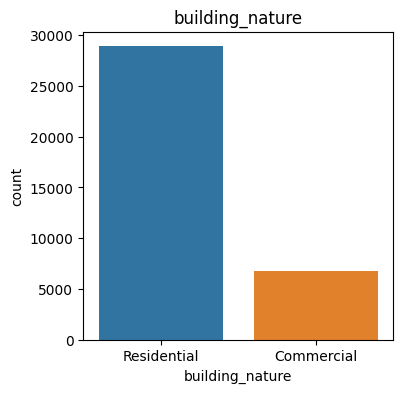

In [ ]:
# building_nature
sns.set
plt.figure(figsize=(4,4))
sns.countplot(x ='building_nature', data = df)
plt.title('building_nature')
plt.show()

In [ ]:
df['building_nature'].value_counts()

Residential    28892
Commercial      6754
Name: building_nature, dtype: int64

# **Univariate Analysis**

In [ ]:
fig1 = px.box(df['price'],width=800, height=400)
fig1.show()

In [ ]:
# Outlier finding for Area 
Q1 = np.percentile(df['price'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['price'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['price'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print('Interquartile range is',IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
Extreme_LL = Q1 - 3 * IQR
Extreme_UL = Q3 + 3 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier1 =[]
outlier2 =[]
for x in df['price']:
    if ((Extreme_UL>x> up_lim) or (Extreme_LL<x<low_lim)):
         outlier1.append(x)
    if ((x> Extreme_UL) or (x<Extreme_LL)):
         outlier2.append(x)
print(' outlier in the dataset is', outlier1+outlier2)
count1=0
for i in outlier1:
  count1+=1
print("Outliers", count1)
count2=0
for i in outlier2:
  count2+=1
print("Extreme Outlier", count2)
print(Q1,Q2,Q3)
df.shape

Interquartile range is 6723000.0
low_limit is -10057500.0
up_limit is 16834500.0
 outlier in the dataset is [20000000.0, 22500000.0, 21000000.0, 22000000.0, 17400000.0, 22000000.0, 24000000.0, 18000000.0, 18500000.0, 20000000.0, 20000000.0, 20000000.0, 20000000.0, 20600000.0, 25000000.0, 20000000.0, 23000000.0, 26500000.0, 20600000.0, 20800000.0, 20800000.0, 25000000.0, 22000000.0, 19200000.0, 20000000.0, 26500000.0, 21500000.0, 26500000.0, 19000000.0, 19000000.0, 18500000.0, 20500000.0, 20500000.0, 25000000.0, 21000000.0, 19500000.0, 20000000.0, 21500000.0, 17500000.0, 23500000.0, 22000000.0, 19000000.0, 21000000.0, 23000000.0, 17500000.0, 17500000.0, 23000000.0, 18000000.0, 17500000.0, 17000000.0, 17500000.0, 22000000.0, 19000000.0, 21800000.0, 25000000.0, 18000000.0, 25000000.0, 25000000.0, 25000000.0, 18000000.0, 17500000.0, 24500000.0, 19500000.0, 18500000.0, 23000000.0, 23500000.0, 21500000.0, 17500000.0, 20000000.0, 17500000.0, 20000000.0, 17500000.0, 17500000.0, 23000000.0, 175

<ipython-input-62-f63a9be3d58e>:2: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

<ipython-input-62-f63a9be3d58e>:3: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

<ipython-input-62-f63a9be3d58e>:4: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)



(35646, 19)

In [ ]:
df = df[df.price < up_lim]
df = df[df.price > low_lim]
df.shape

(32494, 19)

In [ ]:
fig1 = px.box(df['price'],width=800, height=400)
fig1.show()

In [ ]:
fig1 = px.box(df['area'],width=800, height=400,
            labels={"area": "area"})
fig1.show()

In [ ]:
# Outlier finding for Area 
Q1 = np.percentile(df['area'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['area'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['area'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
Extreme_LL = Q1 - 3 * IQR
Extreme_UL = Q3 + 3 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier1 =[]
outlier2 =[]
for x in df['area']:
    if ((Extreme_UL>x> up_lim) or (Extreme_LL<x<low_lim)):
         outlier1.append(x)
    if ((x> Extreme_UL) or (x<Extreme_LL)):
         outlier2.append(x)
print(' outlier in the dataset is', outlier1+outlier2)
count1=0
for i in outlier1:
  count1+=1
print("Outliers", count1)
count2=0
for i in outlier2:
  count2+=1
print("Extreme Outlier", count2)
print(Q1,Q2,Q3)
df.shape

Interquartile range is 942.6917393926219
low_limit is -364.03760908893287
up_limit is 3406.7293484815546
 outlier in the dataset is [3955.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 4320.0, 3600.0, 4320.0, 3850.0, 3888.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3938.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3960.0, 3477.6, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 3600.0, 360

<ipython-input-66-b3ed9a1bc9cb>:2: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

<ipython-input-66-b3ed9a1bc9cb>:3: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

<ipython-input-66-b3ed9a1bc9cb>:4: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)



(32494, 19)

In [ ]:
df = df[df.area < up_lim]
df = df[df.area > low_lim]
df.shape

(30085, 19)

In [ ]:
fig1 = px.box(df['area'],width=800, height=400,
            labels={"area": "area"})
fig1.show()

#4.A) **How do property prices fluctuate for same location?**
The resulting line chart shows the mean property prices for each city in the dataset. It can be seen that some cities have higher mean prices than others, indicating that the cost of living and demand for real estate varies between different locations

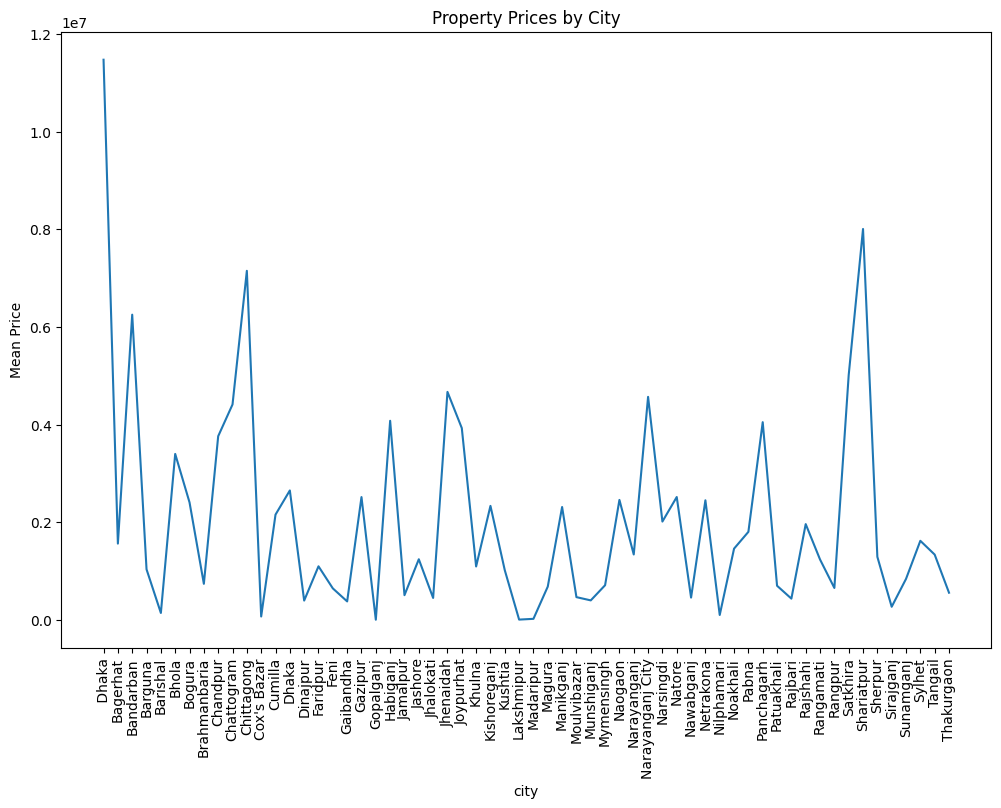

In [ ]:
import matplotlib.pyplot as plt

# group by location and calculate the mean price
price_by_location = df.groupby('city')['price'].mean()

# plot the results as a line chart
plt.figure(figsize=(12, 8))
plt.plot(price_by_location.index, price_by_location.values)
plt.xticks(rotation=90)
plt.xlabel('city')
plt.ylabel('Mean Price')
plt.title('Property Prices by City')
plt.show()

#**Q.4 B) How do property prices fluctuate for same property size?**

In [ ]:
fig = px.scatter(df, x="price", y="area", width=800, height=400,
            labels={"area": "area", "price": "price"})
fig.show()

#**7.A) Which amenities are the more frequent in Residential properties ?**
the percentage contribution of each amenity in Residential properties. The top Three amenities were "expendable_amenity_count" (26.9%),"maintenance_or_cleaning_amenity_count" (17.8%), "security_amenity_count" (17.6%), Unclassified amenities 41.45%

In [ ]:
# Step 1: Subset the DataFrame
amenities_columns = ['garage', 'relaxation_amenity_count', 'security_amenity_count',
                     'maintenance_or_cleaning_amenity_count', 'social_amenity_count',
                     'expendable_amenity_count', 'service_staff_amenity_count',
                     'unclassify_amenity_count']
df_amenities = df[['building_nature'] + amenities_columns]

# Step 2: Filter the DataFrame to only include Residential properties
df_residential = df_amenities[df_amenities['building_nature'] == 'Residential']

# Step 3: Calculate the frequency of each amenity
amenities_frequencies = df_residential[amenities_columns].sum().sort_values(ascending=False)

# Step 4: Sort the frequencies in descending order
amenities_frequencies_sorted = amenities_frequencies.sort_values(ascending=False)

# Step 5: Visualize the frequencies using a bar plot
fig = px.bar(amenities_frequencies, x=amenities_frequencies.index, y=amenities_frequencies.values,
             labels={'x': 'Amenity', 'y': 'Frequency'}, title='Frequencies of amenities in Residential properties')
fig.update_layout(xaxis_tickangle=-5)
fig.show()

**Found expendable_Amenity_count,maintenance or cleaning amenity more frequent**

#**Q.7 B) Which amenities are the more frequent in Commercial properties ?**

the percentage contribution of each amenity in Commercialproperties. The top Three amenities were "expendable_amenity_count" (25.9%),"maintenance_or_cleaning_amenity_count" (17.6%), "security_amenity_count"(11.2%), Unclassified amenities 41.7%


In [ ]:
# Step 2: Filter the DataFrame to only include Commercial properties
df_commercial = df_amenities[df_amenities['building_nature'] == 'Commercial']

# Step 3: Calculate the frequency of each amenity
amenities_frequencies = df_commercial[amenities_columns].sum().sort_values(ascending=False)

# Step 4: Calculate the percentage contribution of each amenity
amenities_percentages = round((amenities_frequencies / amenities_frequencies.sum()) * 100, 1)

# Step 5: Sort the percentages in descending order
amenities_percentages_sorted = amenities_percentages.sort_values(ascending=False)

# Step 6: Visualize the percentages using a bar plot
fig = px.bar(amenities_percentages_sorted, x=amenities_percentages_sorted.index, y=amenities_percentages_sorted.values,
             labels={'x': 'Amenity', 'y': 'Percentage Contribution (%)'},
             title='Percentage Contribution of Amenities in Commercial Properties')
fig.update_layout(xaxis_tickangle=-5)
fig.show()


**Found expendable_Amenity_count,maintenance or cleaning amenity more frequent**

#**Q.7 C) & Q.7 D)  Which amenities have more/ less impact on price?**
- security_amenity_count,maintenance_or_cleaning_amenity_count    
  expendable_amenity_count OBSERVED Moderately positively co-related (0.35) with price and others amenities has no Relation with price  

<Axes: >

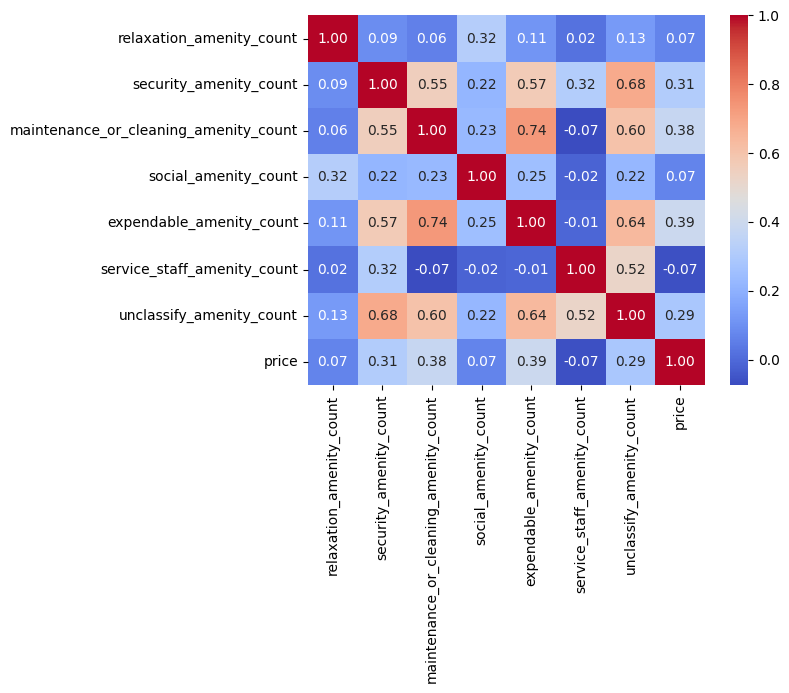

In [ ]:
amenities_cols = ['relaxation_amenity_count', 'security_amenity_count',
                  'maintenance_or_cleaning_amenity_count', 'social_amenity_count',
                  'expendable_amenity_count', 'service_staff_amenity_count',
                  'unclassify_amenity_count', 'price']

# create a correlation matrix
corr = df[amenities_cols].corr()

# plot the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

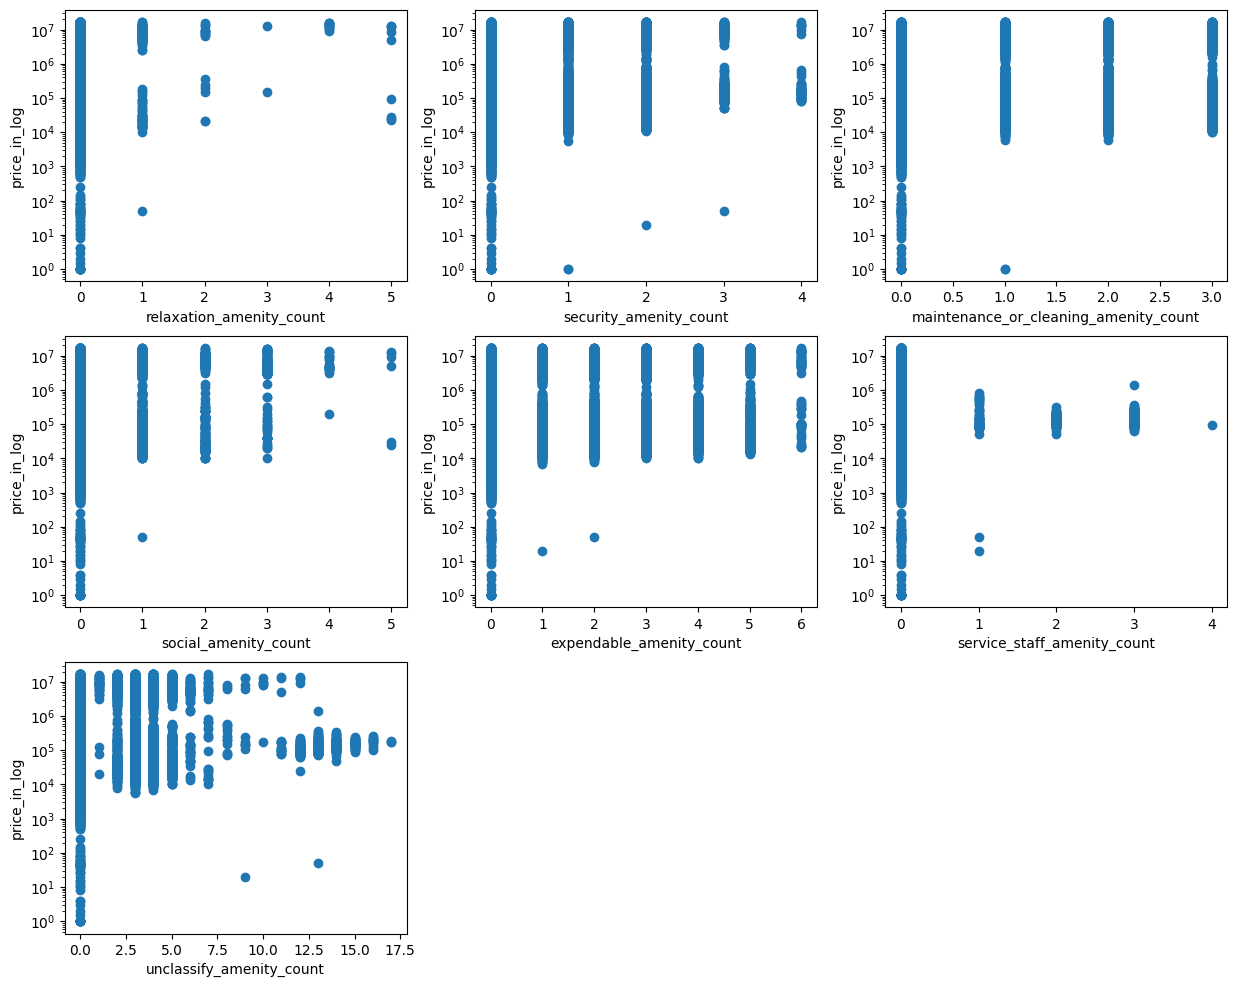

In [ ]:
amenity_counts = ['relaxation_amenity_count','security_amenity_count','maintenance_or_cleaning_amenity_count','social_amenity_count','expendable_amenity_count','service_staff_amenity_count','unclassify_amenity_count']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, ax in enumerate(axes.flat):
    if i >= len(amenity_counts):
        ax.axis('off')
    else:
        amenity_count = amenity_counts[i]
        ax.scatter(df[amenity_count],df['price'])
        ax.set_xlabel(amenity_count)
        ax.set_ylabel('price_in_log')
        ax.set_yscale('log')